In [8]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
############################
# generate data
############################
data_size = 100
x_a = np.random.multivariate_normal([1,1],[[1,0],[0,1]],size=data_size)
y_a = np.zeros([data_size,1],dtype=np.int)
x_b = np.random.multivariate_normal([3,3],[[1,0],[0,1]],size=data_size)
y_b = np.ones([data_size,1],dtype=np.int)

_x = np.append(x_a,x_b,axis=0)
_y = np.append(y_a,y_b,axis=0)

i = range(data_size*2)
np.random.shuffle(i)
_x = np.array([_x[j] for j in i])
_y = np.array([_y[j] for j in i])

split_rate = 0.7
split_size = int(data_size*2*split_rate)
train_x_dataset = _x[:split_size]
train_y_dataset = _y[:split_size]
test_x_dataset = _x[split_size:]
test_y_dataset = _y[split_size:]

In [10]:
#############################
# construct the model
#############################
learning_rate = 0.5
x = tf.placeholder(tf.float32,[None,2],name='x')
y = tf.placeholder(tf.float32,[None,1],name='y')
w = tf.Variable(np.zeros([2,1]),name='w',dtype=tf.float32)
b = tf.Variable(np.zeros([1,1]),name='b',dtype=tf.float32)
y_hat = tf.sigmoid(tf.matmul(x,w) + b)
cost = tf.reduce_mean(tf.square(y - y_hat))
grad = tf.train.AdamOptimizer(learning_rate).minimize(cost)
acc = tf.reduce_mean(tf.cast(tf.equal(tf.cast(y_hat >= 0.5,dtype=tf.float32),y),dtype=tf.float32))

final accuracy :  0.866667


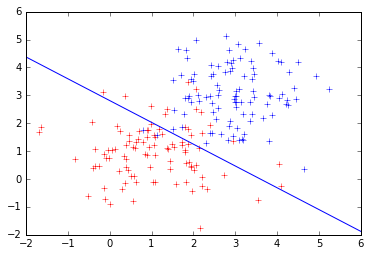

In [11]:
#############################
# train & test the model
#############################
epoch = 1000
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        c,g = sess.run([cost,grad],feed_dict={x:train_x_dataset,y:train_y_dataset})
        if c < 0.1:
            print 'final accuracy : ',sess.run(acc,feed_dict={x:test_x_dataset,y:test_y_dataset})
            break 
            
    ##### plot the model #####
    __w = w.eval(sess)
    __b = b.eval(sess)
    __x = np.linspace(-2,6,num=10)
    __y = (-__b[0,0] - __x * __w[0,0]) / __w[1,0]
    plt.plot(x_a[:,0],x_a[:,1],'r+')
    plt.plot(x_b[:,0],x_b[:,1],'b+')
    plt.plot(__x,__y)